Titanic Study Python

In [61]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data Frame

In [62]:
df = pd.read_csv(r"C:\Users\pavan\Downloads\train.csv")


In [63]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the data above there are 200+ null values in Age, 600+ in Cabin and 2 in Embarked

Text(0.5, 1.0, 'Missing Values Matrix')

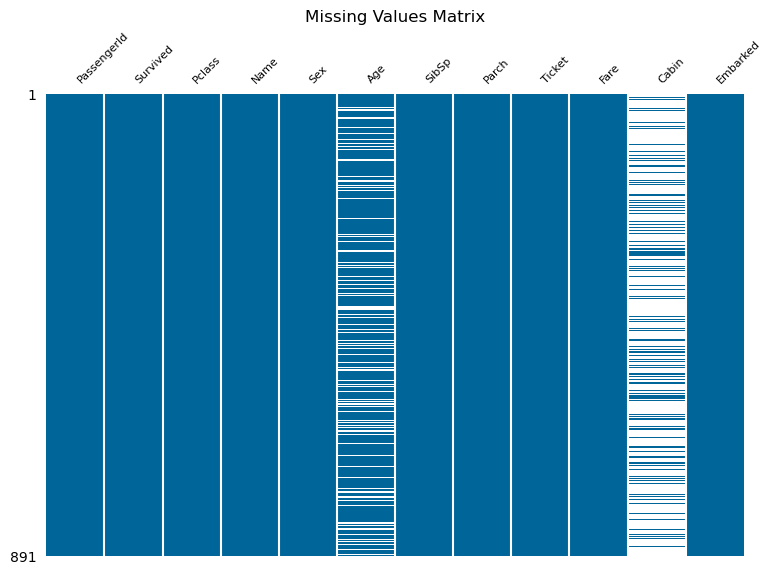

In [66]:
import missingno as msno #

msno.matrix(df, figsize=(9,6), sparkline = False, fontsize = 8, labels =True, color = (0, 0.400,0.600))
plt.title('Missing Values Matrix')

Let's do an EDA to Identify what values we should fill in the null values in Age

Exploring the population of each Pclass

c:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pclass by Population')

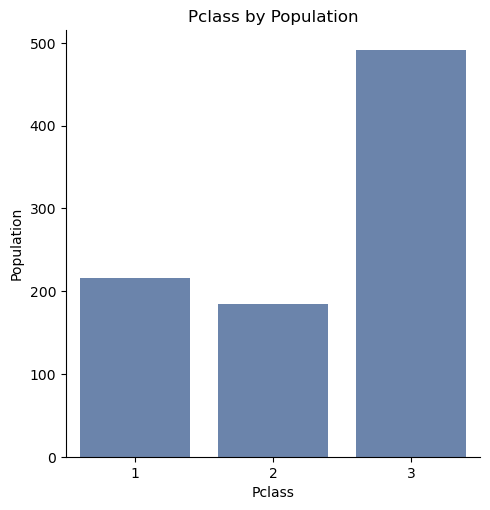

In [67]:
sns.catplot(df,x = 'Pclass', 
            kind = 'count',
           color ='#6082B6')
plt.ylabel('Population')
plt.title('Pclass by Population')

Pclass 3 has more population than Pclass 1 and 2 Combined

Text(0.5, 1.0, 'Age Histogram')

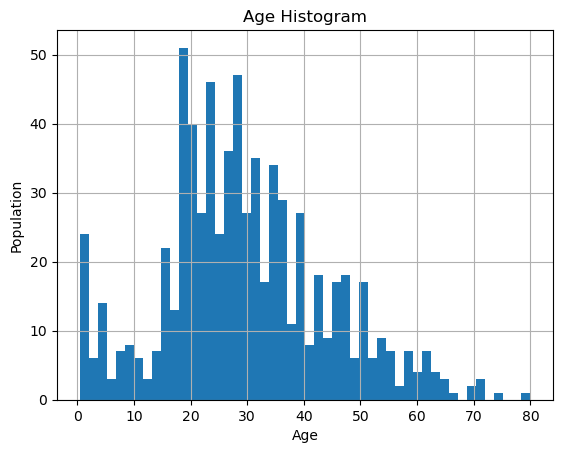

In [68]:
df['Age'].hist(bins = 50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Age Histogram')

A significant percentage of the Ship's population came from Age group 20-30

c:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(4.944444444444445, 0.5, 'Population')

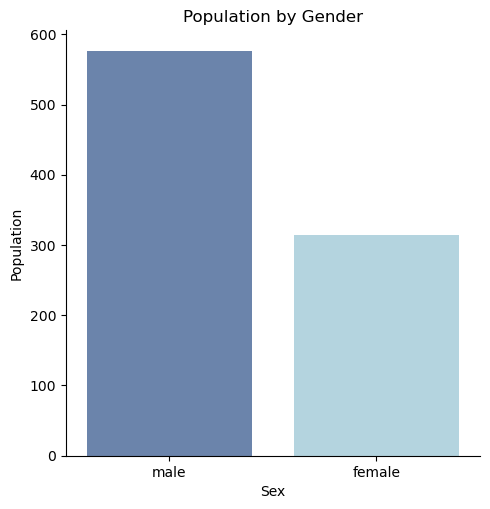

In [69]:
sns.catplot(df,x='Sex',
           kind = 'count',
           palette ={'male':'#6082B6', 'female':'lightblue'})
plt.title('Population by Gender')
plt.ylabel('Population')

Male population is twice as many as Females    
After a brief exploration we can use the mean Age by Pclass and Sex

In [70]:
df.groupby(['Pclass', 'Sex'])['Age'].mean().round()

Pclass  Sex   
1       female    35.0
        male      41.0
2       female    29.0
        male      31.0
3       female    22.0
        male      27.0
Name: Age, dtype: float64

We can use this average to fill in the null values for Age

In [71]:
# Create a function that specifies the age of a null value that varies on Pclass and Gender

# Define a function to replace null values in 'Age'

def n_age(passenger):
    Age, Pclass, Sex = passenger
    
    # Check if Age is null
    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == 'male':
                return 41
            elif Sex == 'female':
                return 35
        elif Pclass == 2:
            if Sex == 'male':
                return 31
            elif Sex == 'female':
                return 29
        elif Pclass == 3:
            if Sex == 'male':
                return 27
            elif Sex == 'female':
                return 22
    else:
        return Age

# Apply the function to replace null values in 'Age' column
df['Age'] = df[['Age', 'Pclass', 'Sex']].apply(n_age, axis=1)

Let's check if the null values were replaced by age from our function

In [72]:
# Check for null values on Age Column

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Missing Values Matrix')

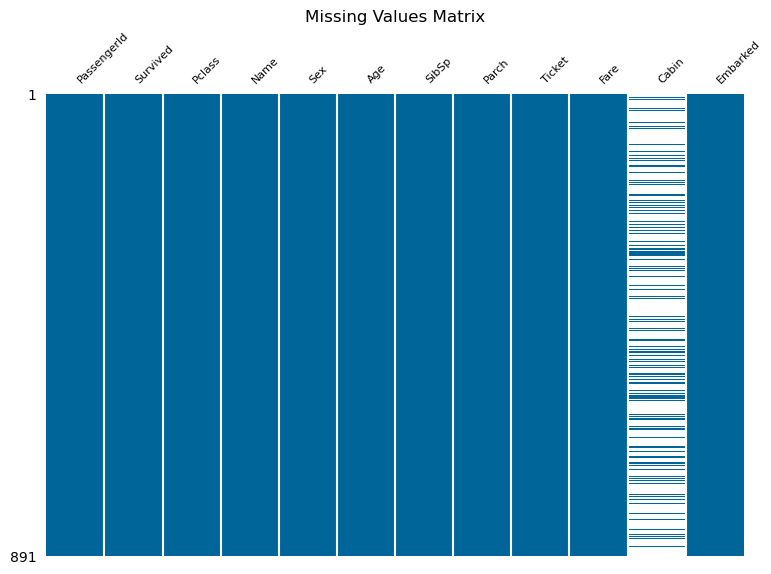

In [73]:
msno.matrix(df, figsize=(9,6), sparkline = False, fontsize = 8, labels =True, color = (0, 0.400,0.600))
plt.title('Missing Values Matrix')

Looks like we fill the null values with the age from the function, we can validate it with the raw data of train and the output of the datafram

Text(0.5, 1.0, 'Age Histogram')

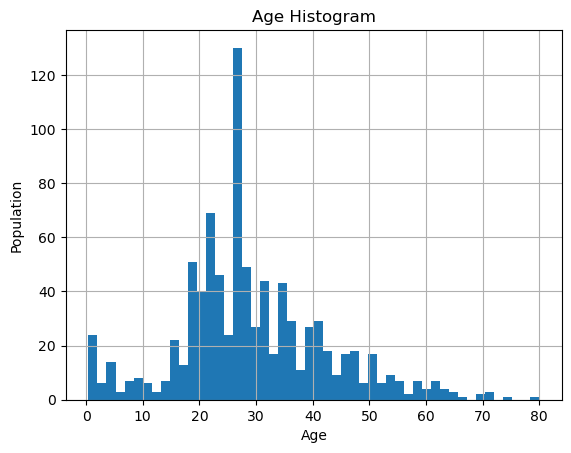

In [74]:
#Graph for Age after replacing null values

df['Age'].hist(bins = 50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Age Histogram')

After replacing the values the histogram shows we have a lot of 27 year olds on the ship.¶
On the average age from the function 27 year old came from Pclass 3 and Male Gender.
Let's Illustrate

c:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(42.89694444444444, 0.5, 'Population')

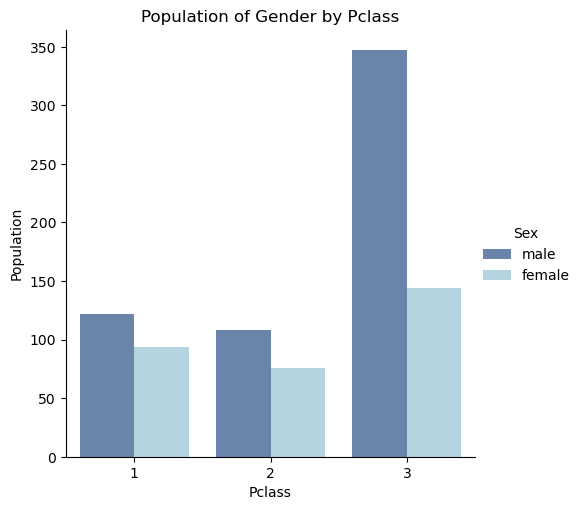

In [85]:
sns.catplot(df, x='Pclass', 
            kind ='count', 
            hue ='Sex', 
            palette ={'male':'#6082B6', 'female':'lightblue'})

plt.title('Population of Gender by Pclass')
plt.ylabel('Population')

The above illustration shows that the female population has survived significantly more than the male population of each Pclass

In [76]:
def mfc(mfc):
    Age, Sex = mfc

    if Age < 17:
        return 'Kid'
    else:
        return Sex


Apply function to the data frame

In [77]:
df['age_group']=df[['Age','Sex']].apply(mfc,axis=1)

In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


c:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Male, Female, and Kid Frequency')

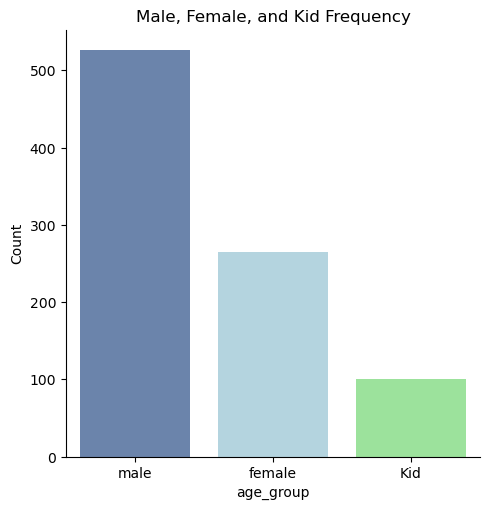

In [79]:
sns.catplot(df, x= 'age_group',
            kind ='count',
           palette ={'male':'#6082B6', 'female':'lightblue', 'Kid': 'lightgreen'})
plt.ylabel('Count')
plt.title('Male, Female, and Kid Frequency')

Survived Analysis

Exploring the survivability of Plcass, Sex, Age, and age_group

C:\Users\pavan\AppData\Local\Temp\ipykernel_15468\2911113109.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  aa = sns.barplot(x=survived_percentage.index, y=survived_percentage.values,


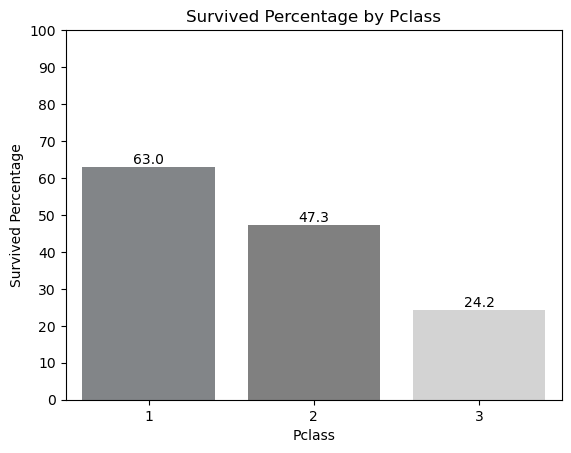

In [80]:
# Calculate survival percentage by Pclass
survived_percentage = df.groupby('Pclass')['Survived'].mean() * 100

# Plotting
aa = sns.barplot(x=survived_percentage.index, y=survived_percentage.values,
                 palette={1: '#818589', 2: '#808080', 3: '#D3D3D3'},
                 ci=None)  # Disable error bars
plt.ylabel('Survived Percentage')
plt.title('Survived Percentage by Pclass')

# Set y-axis limit and ticks
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

for p in aa.patches:
    aa.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show() 


63% of pclass 1 survived while Pclass 2 has 47% and Pclass 3 about 24%


Pclass 3 age average for male is 27 and 22 for females, let's drill down more with other variables.

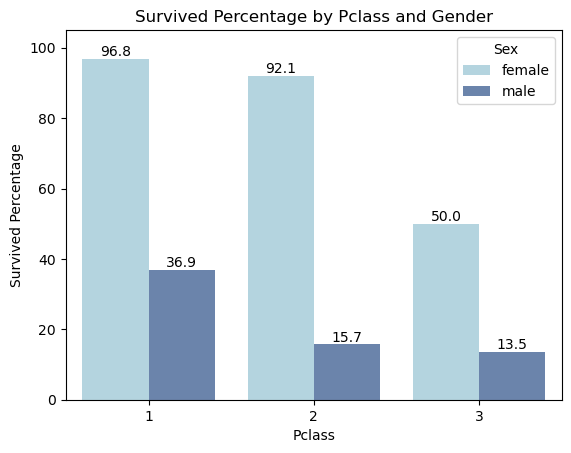

In [90]:
survived_percentage = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100

survived_percentage = survived_percentage.reset_index()

# Plotting
ax = sns.barplot(data=survived_percentage, x='Pclass', y='Survived', hue='Sex',
                 palette={'male': '#6082B6', 'female': 'lightblue'})
plt.ylabel('Survived Percentage')
plt.ylim(0, 105)  # Set y-axis limit
plt.title('Survived Percentage by Pclass and Gender')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show() 


The above illustration shows that the female population has survived significantly more than the male population of each Pclass

C:\Users\pavan\AppData\Local\Temp\ipykernel_15468\1871861530.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=survived_percentage.index, y=survived_percentage.values, ci=None)


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

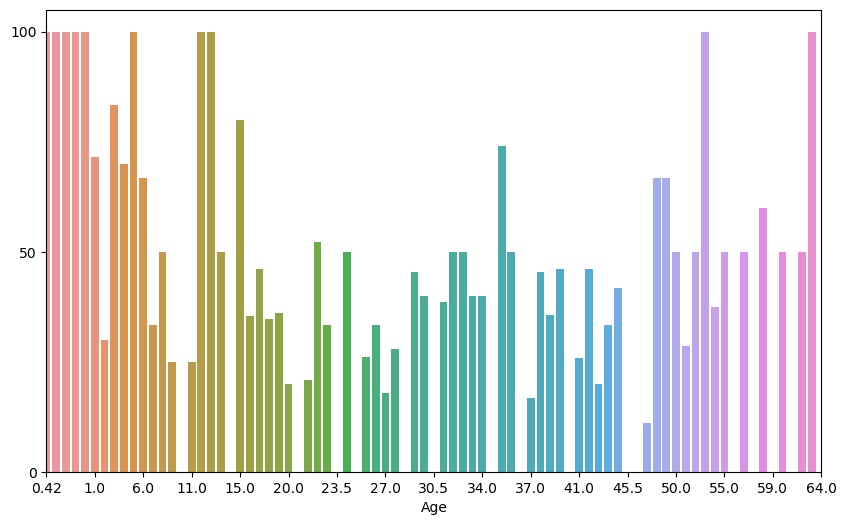

In [82]:
plt.figure(figsize=(10, 6))
survived_percentage = df.groupby('Age')['Survived'].mean() * 100

# Plotting
sns.barplot(x=survived_percentage.index, y=survived_percentage.values, ci=None)

plt.xlim(0, 80)
plt.xticks(range(0, 81, 5))

plt.ylim(0, 105)
plt.yticks([0, 50, 100])

plt.xlabel('Age')
plt.ylabel


Passengers between ages 0-15 survived more than the rest of the age group

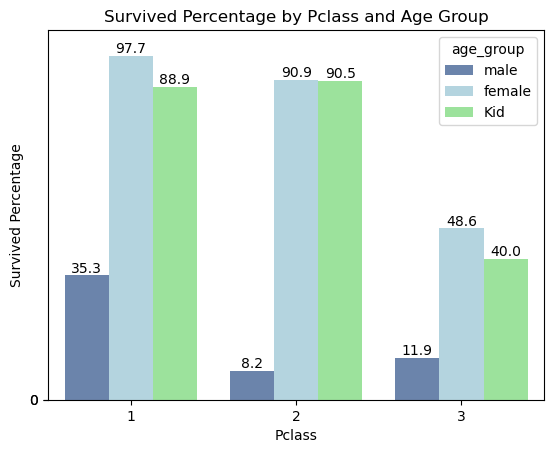

In [83]:
#Survived and Pclass

ax=sns.barplot(df, x='Pclass', y= df['Survived']*100,
           hue ='age_group',
           palette ={'male':'#6082B6', 'female':'lightblue','Kid':'lightgreen'},
           errorbar =None
           )
plt.ylabel('Survived Percentage')
plt.ylim(0,105)
plt.yticks([0, 0])
plt.title('Survived Percentage by Pclass and Age Group')

## Adding data labels on columns
for i in ax.containers:
    ax.bar_label(i,label_type='edge', fmt='%.1f')

The Titanic dataset provides a profound glimpse into the dynamics of survival during the tragic disaster. It offers insights not just into the numerical statistics but also into the human behavior, societal norms, and the ethos of the time.

Gender and Age Dynamics: The dataset indicates a stark contrast in survival rates based on gender and age. Male passengers between the ages of 15 and 50 exhibit notably lower survival rates. This can be attributed to the prevailing social protocol of prioritizing women, children, and the elderly for evacuation, as evidenced by the higher survival rates among these demographic groups.

Social Protocol and Assistance: The lower survival rates among male passengers aged 15-50 may stem from their societal role as protectors and providers, leading them to prioritize the safety of others over their own. Conversely, younger women, especially those in Pclass 3, appear to have been actively involved in rescuing children, as evidenced by the higher proportion of children in Pclass 3 compared to other classes.

Class Disparities: The data also underscores the impact of socio-economic status on survivability. The majority of older survivors are found in Pclass 1, which suggests that passengers in higher socio-economic classes had better access to resources, information, and assistance during the crisis.

Humanitarian Actions: The dataset reflects the selflessness and compassion exhibited by individuals in the face of adversity. It portrays a narrative of individuals making sacrifices, assisting others in need, and acting altruistically during a time of crisis